In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv('Superstore.csv')

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [41]:
data.shape


(9994, 13)

In [43]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [49]:
df = px.data.tips()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:ylabel='Region'>

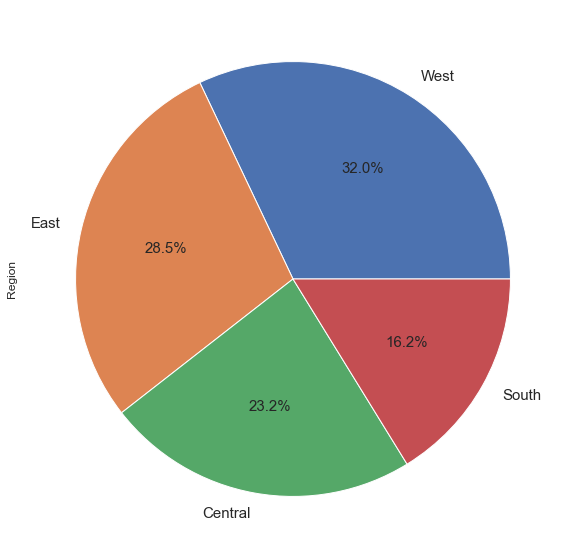

In [72]:
sns.set(rc={'figure.figsize':(10,10)})
data['Region'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=15)


In [73]:
data.duplicated().sum()


17

*There are 17 duplicate value which should be deleted*

In [74]:
data.drop_duplicates(inplace = True)
data.shape

(9977, 13)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [76]:

data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


<AxesSubplot:>

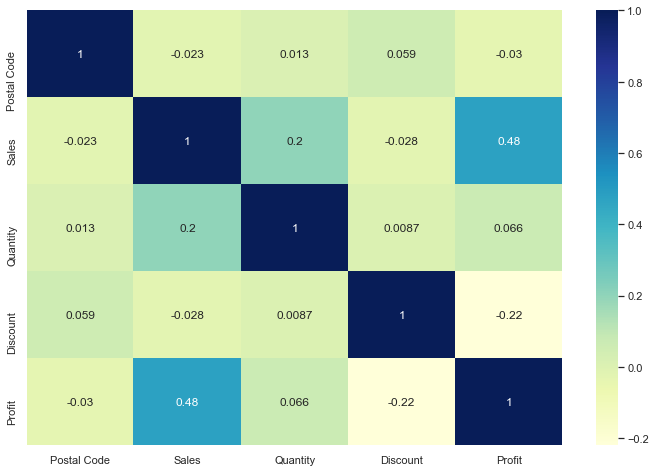

In [79]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [80]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

# Some visualization

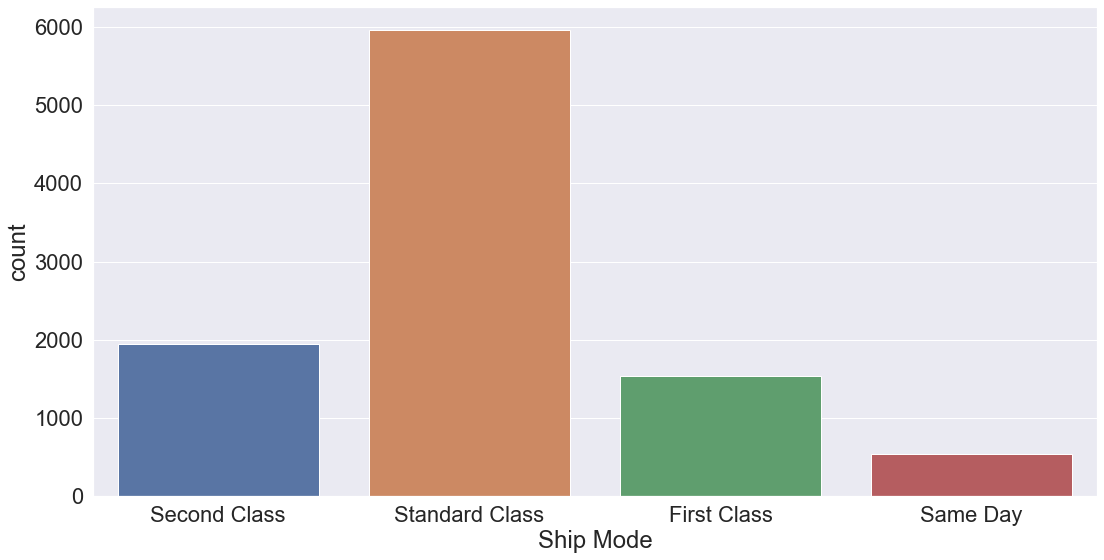

In [93]:
plt.figure(figsize=(18,9),)
sns.countplot(x=data['Ship Mode'])
sns.set(font_scale=2)
plt.show()

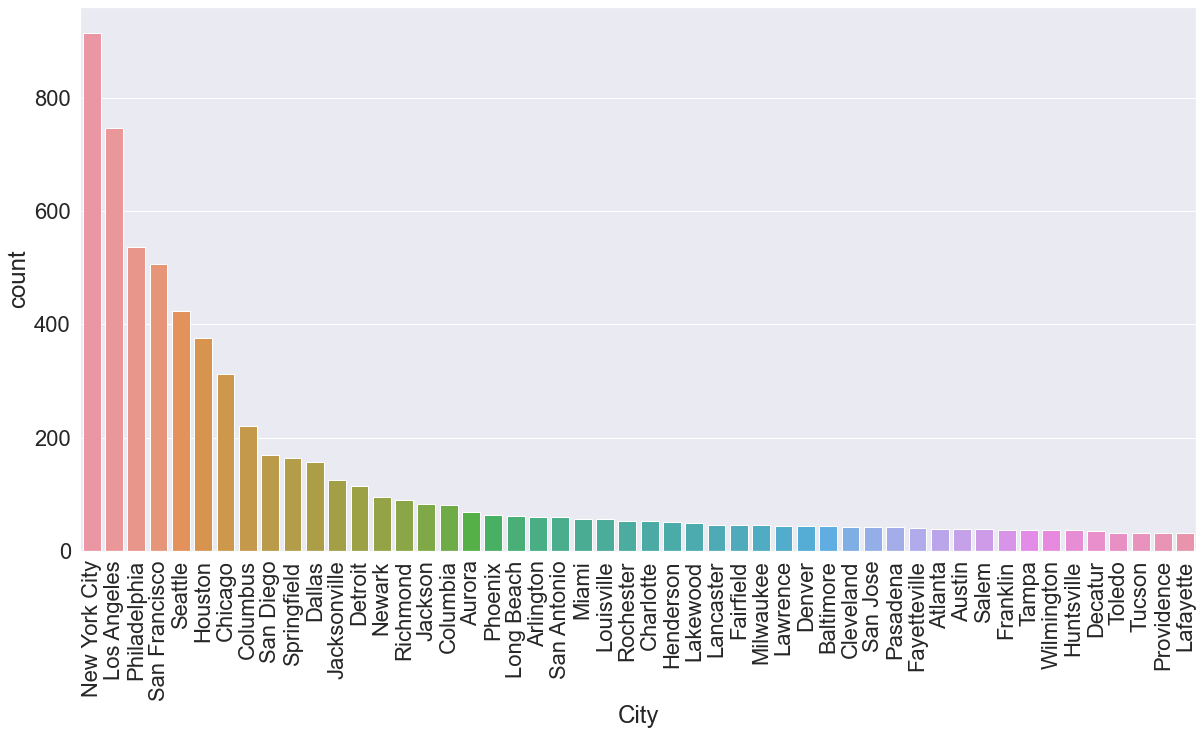

In [95]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['City'],order=(data['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Category'>

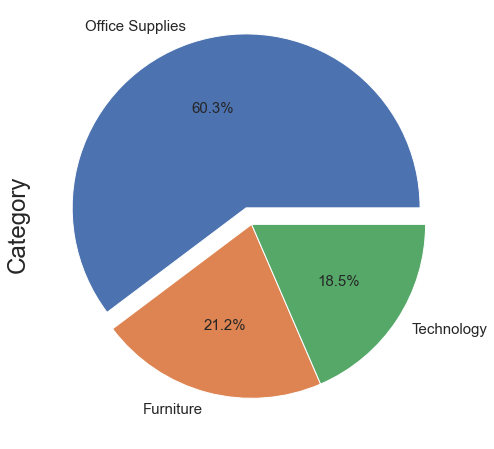

In [103]:
explode = (0.1,0,0)
data['Category'].value_counts().plot.pie(explode=explode,
    autopct='%1.1f%%',fontsize=15)


In [104]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

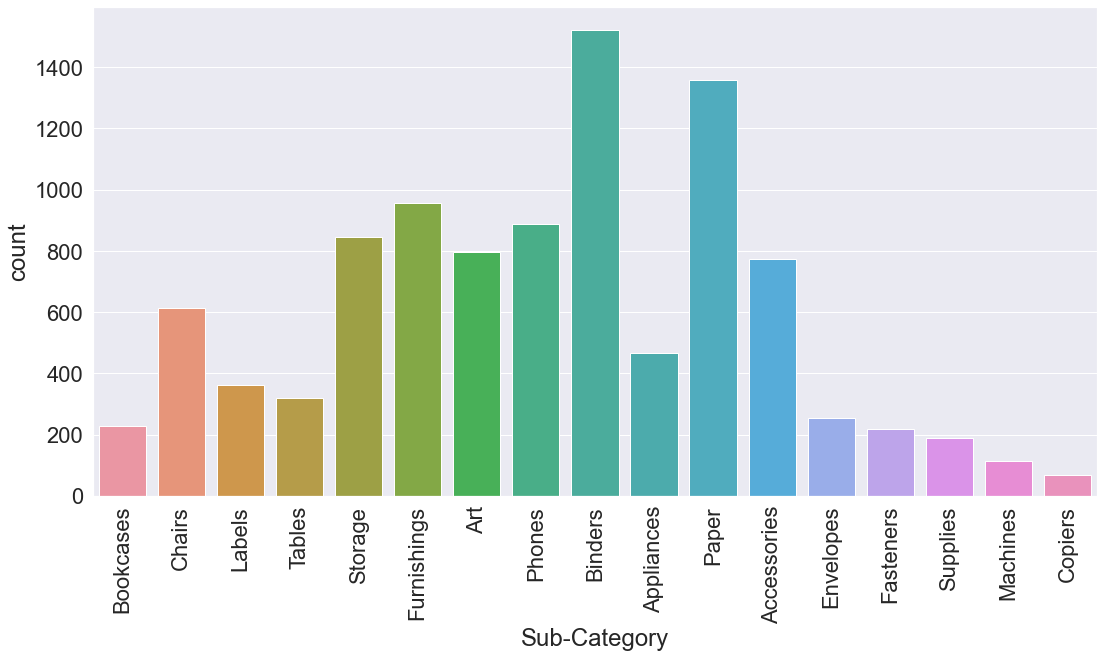

In [105]:
plt.figure(figsize=(18,9))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

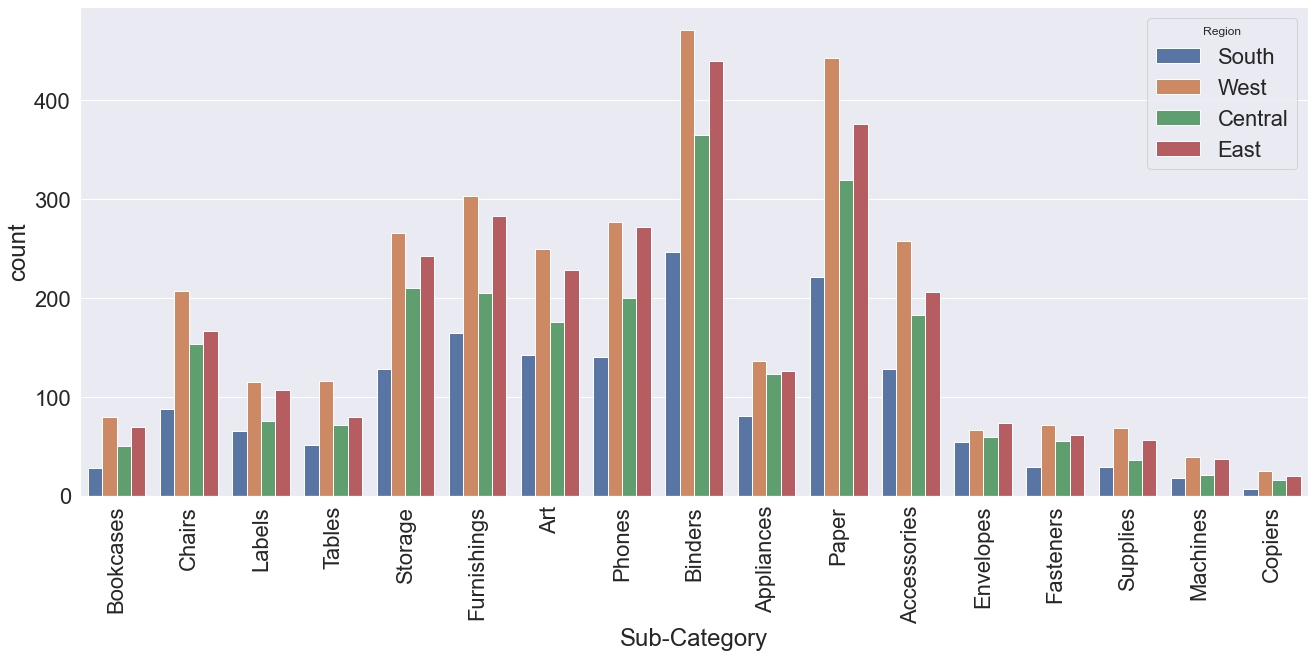

In [109]:
plt.figure(figsize=(22,9))

sns.countplot(x='Sub-Category',hue='Region',data=data)
plt.xticks(rotation=90)
plt.show()


# Conclusion
--------------------------------------
1) **We surely need to work on South Region.**
------------------------------------------------
2) **Office supply are in majority hence it should be modified.**
------------------------------------------------------------------
3) **City Wise New - York wins the most of data.**
---------------------------------------------------
4) **Sales is Directly proportional to Quanity**
---------------------------------------------------